**LSTM for China and India Data Combined**


In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [0]:
dflstm = pd.read_csv('/content/drive/My Drive/COVID-19/COVID-19_Data/Ontario_Confirmed_Cases (1).csv', index_col='Dates')

In [0]:
dflstm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 01/22/2020 to 04/22/2020
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Confirmed Cases      92 non-null     int64
 1   Confirmed deaths     92 non-null     int64
 2   Confirmed Recovered  92 non-null     int64
dtypes: int64(3)
memory usage: 2.9+ KB


In [0]:
dflstm = dflstm.rename(columns={'Confirmed Cases': 'Ontario Confirmed Cases', \
                                'Confirmed deaths': 'Ontario Deaths', \
                                  'Confirmed Recovered': 'Ontario Recovered'})

In [0]:
print(dflstm)

            Ontario Confirmed Cases  Ontario Deaths  Ontario Recovered
Dates                                                                 
01/22/2020                        0               0                  0
01/23/2020                        0               0                  0
01/24/2020                        0               0                  0
01/25/2020                        0               0                  0
01/26/2020                        1               0                  0
...                             ...             ...                ...
04/18/2020                    11013             564              10964
04/19/2020                    11561             591              11847
04/20/2020                    12063             624              12543
04/21/2020                    12715             694              13188
04/22/2020                    13718             762              14454

[92 rows x 3 columns]


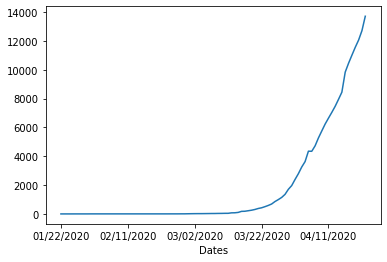

In [0]:
dflstm['Ontario Confirmed Cases'].plot()
#plt.figure(figsize=(16,8))

In [0]:
data = dflstm.filter(['Ontario Confirmed Cases'])

In [0]:
dataset = data.values

In [0]:
training_data_len = math.ceil(len(dataset) * 0.7)
training_data_len

65

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [0]:
scaled_data

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [7.28969237e-05],
       [7.28969237e-05],
       [7.28969237e-05],
       [7.28969237e-05],
       [7.28969237e-05],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.18690771e-04],
       [2.91587695e-04],
       [2.91587695e-04],
       [2.91587695e-04],
       [4.37381542e-04],
       [4.37381542e-04],
       [8.01866161e-04],
       [1.09345386e-03],


In [0]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(10, len(train_data)):
  x_train.append(train_data[i-10:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 10:
    print(x_train)
    print(y_train)
    print()

[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.28969237e-05, 7.28969237e-05, 7.28969237e-05, 7.28969237e-05,
       7.28969237e-05, 2.18690771e-04])]
[0.00021869077124945325]



In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(55, 10, 1)

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
model.fit(x_train,y_train,batch_size=1, epochs=50)

Epoch 1/50
55/55 [==============================] - 1s 22ms/step - loss: 2.1644e-04
Epoch 2/50
55/55 [==============================] - 0s 9ms/step - loss: 2.5148e-04
Epoch 3/50
55/55 [==============================] - 0s 7ms/step - loss: 1.4017e-04
Epoch 4/50
55/55 [==============================] - 0s 8ms/step - loss: 7.2861e-05
Epoch 5/50
55/55 [==============================] - 0s 7ms/step - loss: 4.1316e-05
Epoch 6/50
55/55 [==============================] - 0s 7ms/step - loss: 8.2912e-06
Epoch 7/50
55/55 [==============================] - 0s 7ms/step - loss: 7.5380e-06
Epoch 8/50
55/55 [==============================] - 0s 7ms/step - loss: 2.9812e-06
Epoch 9/50
55/55 [==============================] - 0s 7ms/step - loss: 1.2128e-05
Epoch 10/50
55/55 [==============================] - 0s 8ms/step - loss: 9.8933e-06
Epoch 11/50
55/55 [==============================] - 0s 8ms/step - loss: 3.3103e-06
Epoch 12/50
55/55 [==============================] - 0s 8ms/step - loss: 9.5746e-06


In [0]:
test_data = scaled_data[training_data_len-10: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
  x_test.append(test_data[i-10:i, 0])
  

In [0]:
len(test_data)

37

In [0]:
x_test = np.array(x_test)


In [0]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
x_test

array([[[0.01348593],
        [0.01611022],
        [0.01873451],
        [0.02245225],
        [0.02748214],
        [0.03098119],
        [0.03666715],
        [0.04286339],
        [0.05015308],
        [0.06254556]],

       [[0.01611022],
        [0.01873451],
        [0.02245225],
        [0.02748214],
        [0.03098119],
        [0.03666715],
        [0.04286339],
        [0.05015308],
        [0.06254556],
        [0.07245954]],

       [[0.01873451],
        [0.02245225],
        [0.02748214],
        [0.03098119],
        [0.03666715],
        [0.04286339],
        [0.05015308],
        [0.06254556],
        [0.07245954],
        [0.08339408]],

       [[0.02245225],
        [0.02748214],
        [0.03098119],
        [0.03666715],
        [0.04286339],
        [0.05015308],
        [0.06254556],
        [0.07245954],
        [0.08339408],
        [0.09877533]],

       [[0.02748214],
        [0.03098119],
        [0.03666715],
        [0.04286339],
        [0.05015308],
  

In [0]:
len(x_test)

27

In [0]:
len(x_train)

55

In [0]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
predictions

array([[  929.7679],
       [ 1107.199 ],
       [ 1301.1104],
       [ 1529.4733],
       [ 1846.8972],
       [ 2207.721 ],
       [ 2654.1453],
       [ 3165.1587],
       [ 3740.9282],
       [ 4325.065 ],
       [ 5047.0137],
       [ 5592.4224],
       [ 6074.552 ],
       [ 6623.29  ],
       [ 7235.5415],
       [ 7889.2637],
       [ 8539.209 ],
       [ 9165.745 ],
       [ 9778.087 ],
       [10408.235 ],
       [11070.06  ],
       [12126.236 ],
       [13263.143 ],
       [14328.248 ],
       [15283.881 ],
       [16127.646 ],
       [16944.94  ]], dtype=float32)

In [0]:
len(predictions)

27

In [0]:
rmse = np.sqrt( np.mean( predictions - y_test )**2)
rmse


1090.2954983181423

In [0]:
train = data[:training_data_len]
validontario1 = data[training_data_len:]
validontario1['Ontario Predicted Cases'] = predictions



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


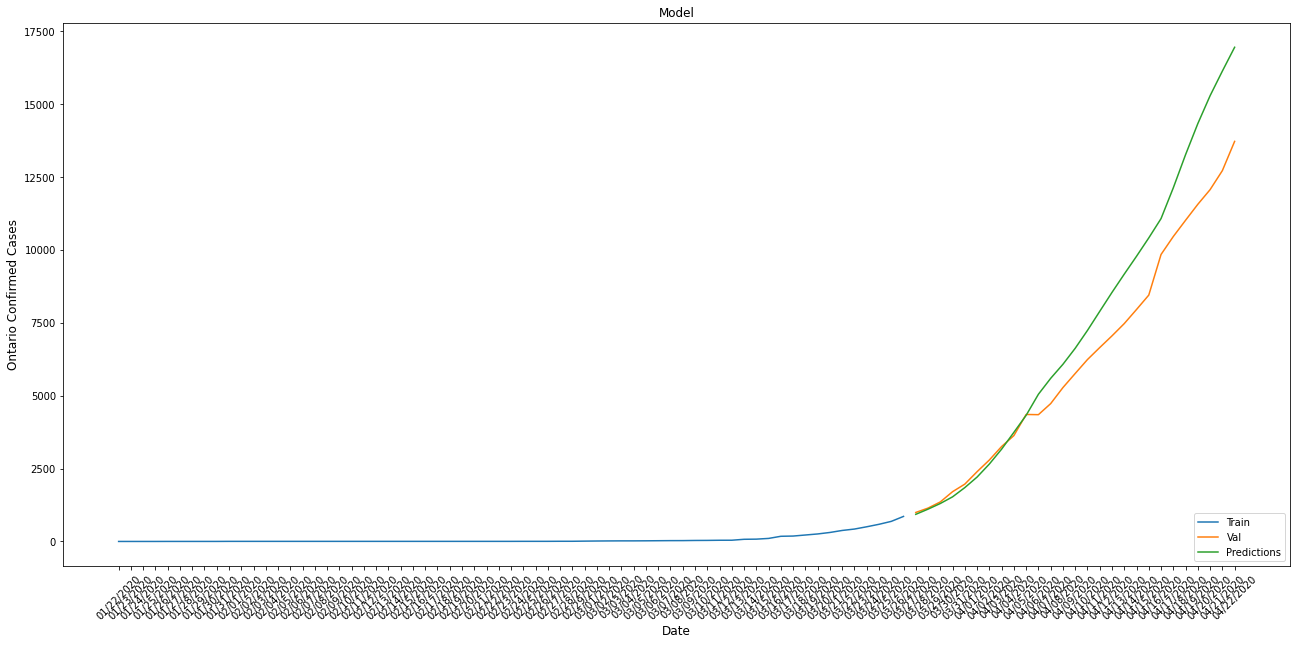

In [0]:
plt.figure(figsize=(22,10))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Ontario Confirmed Cases', fontsize=12)
plt.plot(train['Ontario Confirmed Cases'])
plt.plot(validontario1[['Ontario Confirmed Cases', 'Ontario Predicted Cases']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('/content/drive/My Drive/figzero.png', dpi=300)
#plt.show()

In [0]:
validontario1

,Ontario Confirmed Cases,Ontario Predicted Cases
Dates,,
03/27/2020,994,929.767883
03/28/2020,1144,1107.198975
03/29/2020,1355,1301.110352
03/30/2020,1706,1529.473267
03/31/2020,1966,1846.897217
04/01/2020,2392,2207.720947
04/02/2020,2793,2654.145264
04/03/2020,3255,3165.158691
04/04/2020,3630,3740.928223


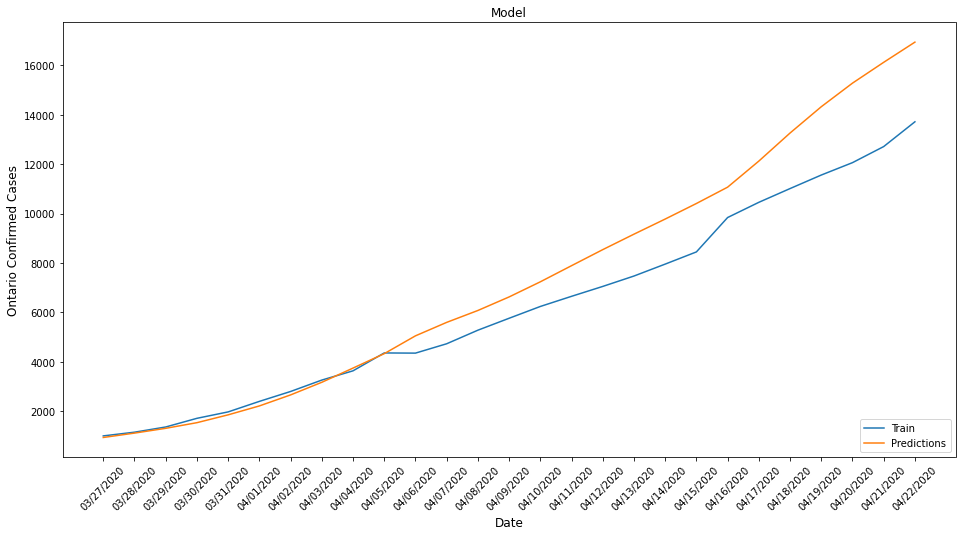

In [0]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Ontario Confirmed Cases', fontsize=12)
plt.plot(validontario1)
plt.legend(['Train', 'Predictions'], loc='lower right')
plt.savefig('/content/drive/My Drive/figone.png', dpi=300)
#plt.show()

In [0]:
from sklearn.metrics import r2_score
score = r2_score(validontario1['Ontario Confirmed Cases'], validontario1['Ontario Predicted Cases'])
print(score)

0.8294163457032453


LSTM FOR CHINA DEATHS

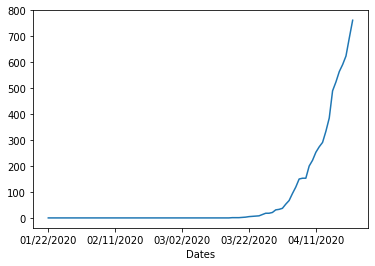

In [0]:
df2 = dflstm['Ontario Deaths'].plot()
#plt.figure(figsize=(16,8))

In [0]:
data2 = dflstm.filter(['Ontario Deaths'])

In [0]:
dataset2 = data2.values

In [0]:
training_data_len2 = math.ceil(len(dataset2) * 0.7)
training_data_len2

65

In [0]:
scaler2 = MinMaxScaler(feature_range=(0,1))
scaled_data2 = scaler2.fit_transform(dataset2)

In [0]:
scaled_data2

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [0]:
train_data2 = scaled_data2[0:training_data_len2, :]
x_train2 = []
y_train2 = []

for i in range(10, len(train_data2)):
  x_train2.append(train_data2[i-10:i, 0])
  y_train2.append(train_data2[i, 0])
  if i<= 10:
    print(x_train2)
    print(y_train2)
    print()

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]
[0.0]



In [0]:
x_train2, y_train2 = np.array(x_train2), np.array(y_train2)

In [0]:
x_train2 = np.reshape(x_train2, (x_train2.shape[0], x_train2.shape[1], 1))
x_train2.shape

(55, 10, 1)

In [0]:
model2 = Sequential()
model2.add(LSTM(50, return_sequences=True, input_shape=(x_train2.shape[1], 1)))
model2.add(LSTM(50, return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))

In [0]:
#compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
model2.fit(x_train2, y_train2, batch_size=1, epochs=50)

55/55 [==============================] - 1s 19ms/step - loss: 3.4427e-05
Epoch 2/50
55/55 [==============================] - 1s 9ms/step - loss: 1.9196e-05
Epoch 3/50
55/55 [==============================] - 1s 9ms/step - loss: 1.2159e-05
Epoch 4/50
55/55 [==============================] - 0s 8ms/step - loss: 2.1599e-05
Epoch 5/50
55/55 [==============================] - 1s 9ms/step - loss: 1.8209e-05
Epoch 6/50
55/55 [==============================] - 1s 10ms/step - loss: 1.9024e-05
Epoch 7/50
55/55 [==============================] - 0s 8ms/step - loss: 1.8637e-05
Epoch 8/50
55/55 [==============================] - 1s 10ms/step - loss: 1.7025e-05
Epoch 9/50
55/55 [==============================] - 0s 8ms/step - loss: 1.6796e-05
Epoch 10/50
55/55 [==============================] - 0s 8ms/step - loss: 1.2804e-05
Epoch 11/50
55/55 [==============================] - 1s 9ms/step - loss: 1.2940e-05
Epoch 12/50
55/55 [==============================] - 0s 9ms/step - loss: 1.6997e-05
Epoch 13/

In [0]:
test_data2 = scaled_data2[training_data_len2-10: , :]
x_test2 = []
y_test2 = dataset2[training_data_len2:, :]
for i in range(10, len(test_data2)):
  x_test2.append(test_data2[i-10:i, 0])
  

In [0]:
len(test_data2)

37

In [0]:
x_test2 = np.array(x_test2)

In [0]:
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1 ))

In [0]:
predictions2 = model.predict(x_test2)
predictions2 = scaler2.inverse_transform(predictions2)

In [0]:
rmse = np.sqrt( np.mean( predictions2 - y_test )**2)
rmse

5963.649526172214

In [0]:
train2 = data2[:training_data_len2]
validontario2 = data2[training_data_len2:]
validontario2['Ontario Predicted Deaths'] = predictions2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
validontario2


,Ontario Deaths,Ontario Predicted Deaths
Dates,,
03/27/2020,18,12.305456
03/28/2020,18,17.003265
03/29/2020,21,20.828114
03/30/2020,31,24.431778
03/31/2020,33,30.957291
04/01/2020,37,37.290581
04/02/2020,53,43.297703
04/03/2020,67,53.950474
04/04/2020,94,68.731575


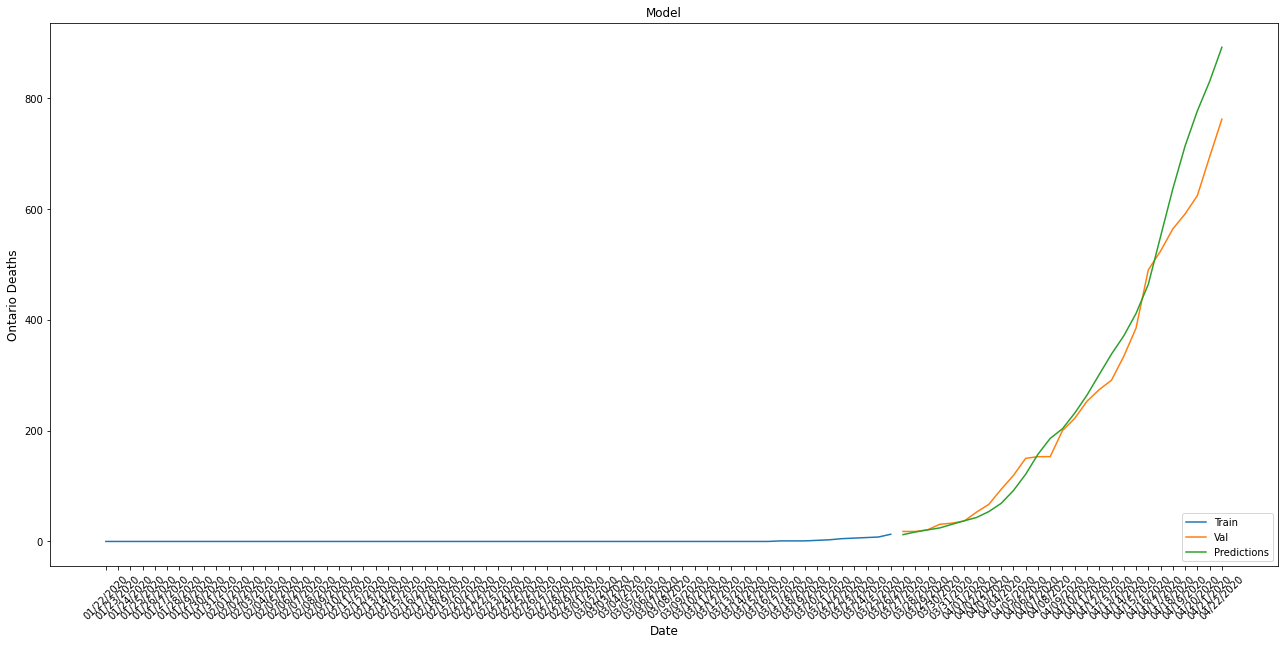

In [0]:
plt.figure(figsize=(22,10))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Ontario Deaths', fontsize=12)
plt.plot(train2['Ontario Deaths'])
plt.plot(validontario2[['Ontario Deaths', 'Ontario Predicted Deaths']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
#plt.savefig('/content/drive/My Drive/figzero.png', dpi=300)
plt.show()

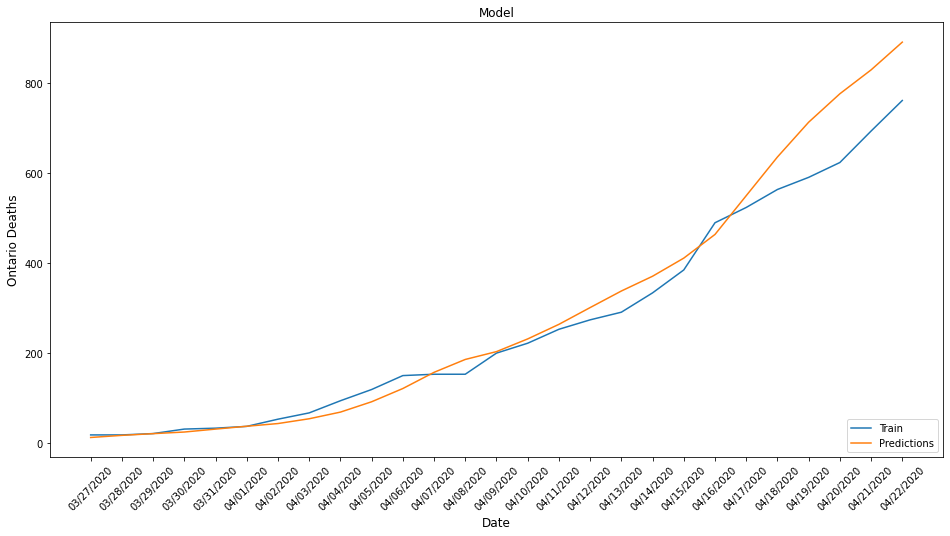

In [0]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Ontario Deaths', fontsize=12)
plt.plot(validontario2)
plt.legend(['Train', 'Predictions'], loc='lower right')
#plt.savefig('/content/drive/My Drive/figone.png', dpi=300)
plt.show()

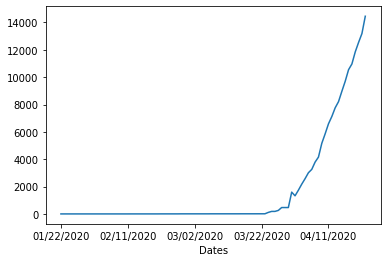

In [0]:
df3 = dflstm['Ontario Recovered'].plot()


In [0]:
data3 = dflstm.filter(['Ontario Recovered'])

In [0]:
dataset3 = data3.values

In [0]:
training_data_len3 = math.ceil(len(dataset3) * 0.7)
training_data_len3

65

In [0]:
scaler3 = MinMaxScaler(feature_range=(0,1))
scaled_data3 = scaler3.fit_transform(dataset3)

In [0]:
scaled_data3

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [6.91850007e-05],
       [6.91850007e-05],
       [6.91850007e-05],
       [6.91850007e-05],
       [6.91850007e-05],
       [6.91850007e-05],
       [6.91850007e-05],
       [6.91850007e-05],
       [6.91850007e-05],
       [2.07555002e-04],
       [2.07555002e-04],
       [2.07555002e-04],
       [2.07555002e-04],
       [2.07555002e-04],
       [2.07555002e-04],
       [4.15110004e-04],
       [4.15110004e-04],
       [4.15110004e-04],
       [4.15110004e-04],


In [0]:
train_data3 = scaled_data3[0:training_data_len2, :]
x_train3 = []
y_train3 = []

for i in range(10, len(train_data3)):
  x_train3.append(train_data3[i-10:i, 0])
  y_train3.append(train_data3[i, 0])
  if i<= 10:
    print(x_train3)
    print(y_train3)
    print()

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]
[0.0]



In [0]:
x_train3, y_train3 = np.array(x_train3), np.array(y_train3)

In [0]:
x_train3 = np.reshape(x_train3, (x_train3.shape[0], x_train3.shape[1], 1))
x_train3.shape

(55, 10, 1)

In [0]:
model3 = Sequential()
model3.add(LSTM(50, return_sequences=True, input_shape=(x_train2.shape[1], 1)))
model3.add(LSTM(50, return_sequences=False))
model3.add(Dense(25))
model3.add(Dense(1))

In [0]:
model3.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
model3.fit(x_train3, y_train3, batch_size=1, epochs=50)

Epoch 1/50
55/55 [==============================] - 1s 18ms/step - loss: 3.3181e-05
Epoch 2/50
55/55 [==============================] - 0s 8ms/step - loss: 1.3292e-05
Epoch 3/50
55/55 [==============================] - 0s 8ms/step - loss: 1.2245e-05
Epoch 4/50
55/55 [==============================] - 0s 8ms/step - loss: 1.2836e-05
Epoch 5/50
55/55 [==============================] - 0s 8ms/step - loss: 1.1891e-05
Epoch 6/50
55/55 [==============================] - 0s 8ms/step - loss: 1.5367e-05
Epoch 7/50
55/55 [==============================] - 0s 8ms/step - loss: 1.3684e-05
Epoch 8/50
55/55 [==============================] - 0s 9ms/step - loss: 1.0143e-05
Epoch 9/50
55/55 [==============================] - 0s 8ms/step - loss: 8.1668e-06
Epoch 10/50
55/55 [==============================] - 0s 9ms/step - loss: 1.0368e-05
Epoch 11/50
55/55 [==============================] - 0s 8ms/step - loss: 7.9957e-06
Epoch 12/50
55/55 [==============================] - 0s 8ms/step - loss: 8.7778e-06


In [0]:
test_data3 = scaled_data3[training_data_len3-10: , :]
x_test3 = []
y_test3 = dataset3[training_data_len3:, :]
for i in range(10, len(test_data3)):
  x_test3.append(test_data2[i-10:i, 0])
  

In [0]:
len(test_data3)

37

In [0]:
x_test3 = np.array(x_test3)

In [0]:
x_test3 = np.reshape(x_test3, (x_test3.shape[0], x_test3.shape[1], 1 ))

In [0]:
predictions3 = model.predict(x_test3)
predictions3 = scaler3.inverse_transform(predictions3)

In [0]:
rmse = np.sqrt( np.mean( predictions3 - y_test )**2)
rmse

740.4964746545862

In [0]:
train3 = data3[:training_data_len3]
validontario3 = data3[training_data_len3:]
validontario3['Ontario Predicted Recovered'] = predictions3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
validontario3


,Ontario Recovered,Ontario Predicted Recovered
Dates,,
03/27/2020,256,233.416107
03/28/2020,466,322.526520
03/29/2020,466,395.078125
03/30/2020,466,463.434296
03/31/2020,1592,587.213501
04/01/2020,1324,707.346497
04/02/2020,1735,821.292664
04/03/2020,2175,1023.359741
04/04/2020,2577,1303.735229


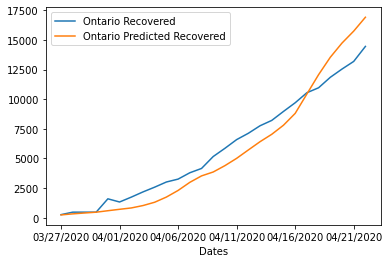

In [0]:
validontario3.plot()

In [0]:
valid_final_lstm = validontario1.join(validontario2.join(validontario3))
valid_final_lstm

,Ontario Confirmed Cases,Ontario Predicted Cases,Ontario Deaths,Ontario Predicted Deaths,Ontario Recovered,Ontario Predicted Recovered
Dates,,,,,,
03/27/2020,994,929.767883,18,12.305456,256,233.416107
03/28/2020,1144,1107.198975,18,17.003265,466,322.526520
03/29/2020,1355,1301.110352,21,20.828114,466,395.078125
03/30/2020,1706,1529.473267,31,24.431778,466,463.434296
03/31/2020,1966,1846.897217,33,30.957291,1592,587.213501
04/01/2020,2392,2207.720947,37,37.290581,1324,707.346497
04/02/2020,2793,2654.145264,53,43.297703,1735,821.292664
04/03/2020,3255,3165.158691,67,53.950474,2175,1023.359741
04/04/2020,3630,3740.928223,94,68.731575,2577,1303.735229


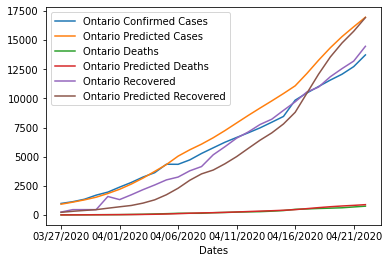

In [0]:
valid_final_lstm.plot()

In [0]:
from sklearn.metrics import *

In [0]:
score = r2_score(valid_final_lstm['Ontario Confirmed Cases'], valid_final_lstm['Ontario Predicted Cases'])
score

In [0]:
score1 = r2_score(valid_final_lstm['Ontario Deaths'], valid_final_lstm['Ontario Predicted Deaths'])
score1

0.9368773536256461

In [0]:
score3 = r2_score(valid_final_lstm['Ontario Recovered'], valid_final_lstm['Ontario Predicted Recovered'])
score3

0.9143491422851617

In [0]:
Average = (score + score1 + score3) / 3
Average

0.893547613871351

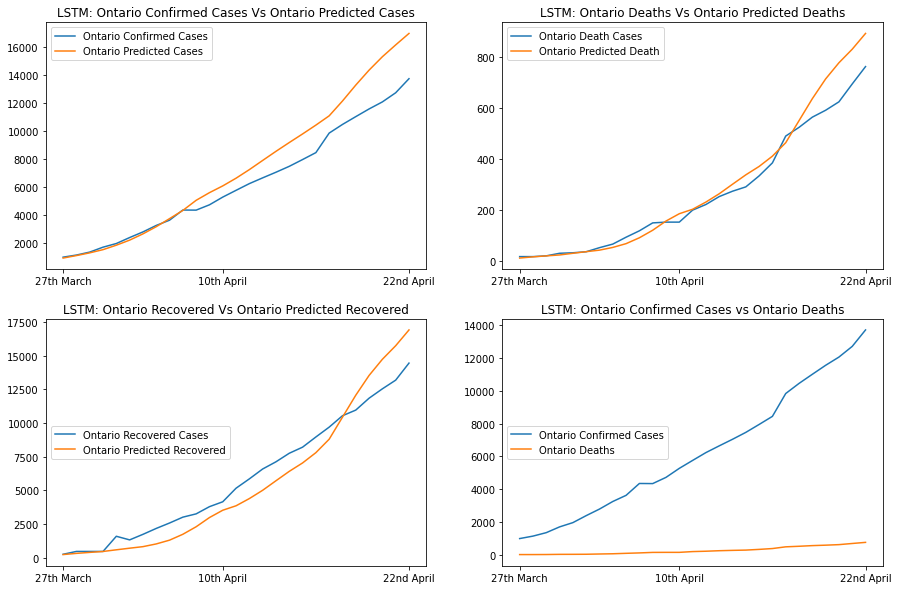

In [0]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(2,2,figsize=(15,10))
#plt.xticks([1,2,3], [1,2,3], [1,2,3], [1,2,3]) #['jan', 'March', 'April'], ['jan', 'March', 'April'], ['jan', 'March', 'April'])
plt.setp(a, xticks=[0, 12, 26], xticklabels=['27th March', '10th April', '22nd April'])

a[0][0].plot(valid_final_lstm['Ontario Confirmed Cases']) 
a[0][0].plot(valid_final_lstm['Ontario Predicted Cases'])
a[0][0].legend(['Ontario Confirmed Cases','Ontario Predicted Cases'], loc="upper left")
a[0][0].set_title('LSTM: Ontario Confirmed Cases Vs Ontario Predicted Cases')
a[0][1].plot(valid_final_lstm['Ontario Deaths'])
a[0][1].plot(valid_final_lstm['Ontario Predicted Deaths'])
a[0][1].legend(['Ontario Death Cases','Ontario Predicted Death'], loc="upper left")
a[0][1].set_title('LSTM: Ontario Deaths Vs Ontario Predicted Deaths')
a[1][0].plot(valid_final_lstm['Ontario Recovered'])
a[1][0].plot(valid_final_lstm['Ontario Predicted Recovered'])
a[1][0].legend(['Ontario Recovered Cases','Ontario Predicted Recovered'], loc="center left")
a[1][0].set_title('LSTM: Ontario Recovered Vs Ontario Predicted Recovered')
a[1][1].plot(valid_final_lstm['Ontario Confirmed Cases'])
a[1][1].plot(valid_final_lstm['Ontario Deaths'])
a[1][1].legend(['Ontario Confirmed Cases','Ontario Deaths'], loc="center left")
a[1][1].set_title('LSTM: Ontario Confirmed Cases vs Ontario Deaths')

plt.savefig('/content/drive/My Drive/COVID-19/COVID-19_Data/ontariogrid_LSTM.png', dpi=1200)


**LSTM for China and India Data Combined**


In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [0]:
dflstm = pd.read_csv('/content/drive/My Drive/COVID-19/COVID-19_Data/new_combinedhebei (1).csv', index_col='Dates')

In [0]:
dflstm = dflstm.rename(columns={'Confirmed Cases': 'Hebei Confirmed Cases', \
                                'Deaths': 'Hebei Deaths', \
                                  'Recovered': 'Hebei Recovered'})

In [0]:
print(dflstm)

            Hebei Confirmed Cases  Hebei Deaths  Hebei Recovered
Dates                                                           
01/22/2020                      1             0                0
01/23/2020                      1             1                0
01/24/2020                      2             1                0
01/25/2020                      8             1                0
01/26/2020                     13             1                0
...                           ...           ...              ...
04/18/2020                    328             6              316
04/19/2020                    328             6              316
04/20/2020                    328             6              317
04/21/2020                    328             6              317
04/22/2020                    328             6              317

[92 rows x 3 columns]


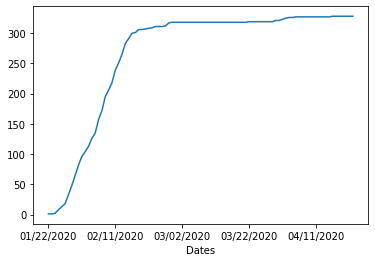

In [0]:
dflstm['Hebei Confirmed Cases'].plot()
#plt.figure(figsize=(16,8))

In [0]:
data = dflstm.filter(['Hebei Confirmed Cases'])

In [0]:
dataset = data.values

In [0]:
training_data_len = math.ceil(len(dataset) * 0.7)
training_data_len

65

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [0]:
scaled_data

array([[0.        ],
       [0.        ],
       [0.0030581 ],
       [0.02140673],
       [0.03669725],
       [0.05198777],
       [0.09785933],
       [0.14373089],
       [0.19571865],
       [0.24770642],
       [0.29051988],
       [0.31498471],
       [0.34250765],
       [0.382263  ],
       [0.40978593],
       [0.47706422],
       [0.52293578],
       [0.59327217],
       [0.62691131],
       [0.66360856],
       [0.72782875],
       [0.76452599],
       [0.80733945],
       [0.86238532],
       [0.88685015],
       [0.91437309],
       [0.91743119],
       [0.93272171],
       [0.93272171],
       [0.93577982],
       [0.93883792],
       [0.94189602],
       [0.94801223],
       [0.94801223],
       [0.94801223],
       [0.95107034],
       [0.96636086],
       [0.96941896],
       [0.96941896],
       [0.96941896],
       [0.96941896],
       [0.96941896],
       [0.96941896],
       [0.96941896],
       [0.96941896],
       [0.96941896],
       [0.96941896],
       [0.969

In [0]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(10, len(train_data)):
  x_train.append(train_data[i-10:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 10:
    print(x_train)
    print(y_train)
    print()

[array([0.        , 0.        , 0.0030581 , 0.02140673, 0.03669725,
       0.05198777, 0.09785933, 0.14373089, 0.19571865, 0.24770642])]
[0.290519877675841]



In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(55, 10, 1)

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
model.fit(x_train,y_train,batch_size=1, epochs=50)

Epoch 1/50
55/55 [==============================] - 1s 18ms/step - loss: 0.1080
Epoch 2/50
55/55 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 3/50
55/55 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 4/50
55/55 [==============================] - 1s 9ms/step - loss: 0.0022
Epoch 5/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 6/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 7/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 8/50
55/55 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 9/50
55/55 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 10/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 11/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 12/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 13/50
55/55 [=============================

In [0]:
test_data = scaled_data[training_data_len-10: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
  x_test.append(test_data[i-10:i, 0])
  

In [0]:
len(test_data)

37

In [0]:
x_test = np.array(x_test)


In [0]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
x_test

array([[[0.96941896],
        [0.96941896],
        [0.96941896],
        [0.96941896],
        [0.96941896],
        [0.97247706],
        [0.97247706],
        [0.97247706],
        [0.97247706],
        [0.97247706]],

       [[0.96941896],
        [0.96941896],
        [0.96941896],
        [0.96941896],
        [0.97247706],
        [0.97247706],
        [0.97247706],
        [0.97247706],
        [0.97247706],
        [0.97247706]],

       [[0.96941896],
        [0.96941896],
        [0.96941896],
        [0.97247706],
        [0.97247706],
        [0.97247706],
        [0.97247706],
        [0.97247706],
        [0.97247706],
        [0.97247706]],

       [[0.96941896],
        [0.96941896],
        [0.97247706],
        [0.97247706],
        [0.97247706],
        [0.97247706],
        [0.97247706],
        [0.97247706],
        [0.97247706],
        [0.97247706]],

       [[0.96941896],
        [0.97247706],
        [0.97247706],
        [0.97247706],
        [0.97247706],
  

In [0]:
len(x_test)

27

In [0]:
len(x_train)

55

In [0]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
predictions

array([[322.17642],
       [322.20206],
       [322.21964],
       [322.23178],
       [322.34586],
       [322.4807 ],
       [322.7039 ],
       [323.03174],
       [323.40005],
       [323.7261 ],
       [324.03622],
       [324.28842],
       [324.4791 ],
       [324.61786],
       [324.70538],
       [324.7682 ],
       [324.80438],
       [324.82114],
       [324.8286 ],
       [324.83502],
       [324.83502],
       [324.8868 ],
       [324.94904],
       [325.00644],
       [325.05264],
       [325.08658],
       [325.10995]], dtype=float32)

In [0]:
len(predictions)

27

In [0]:
rmse = np.sqrt( np.mean( predictions - y_test )**2)
rmse


1.6433681911892362

In [0]:
train = data[:training_data_len]
validHebei1 = data[training_data_len:]
validHebei1['Hebei Predicted Cases'] = predictions



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


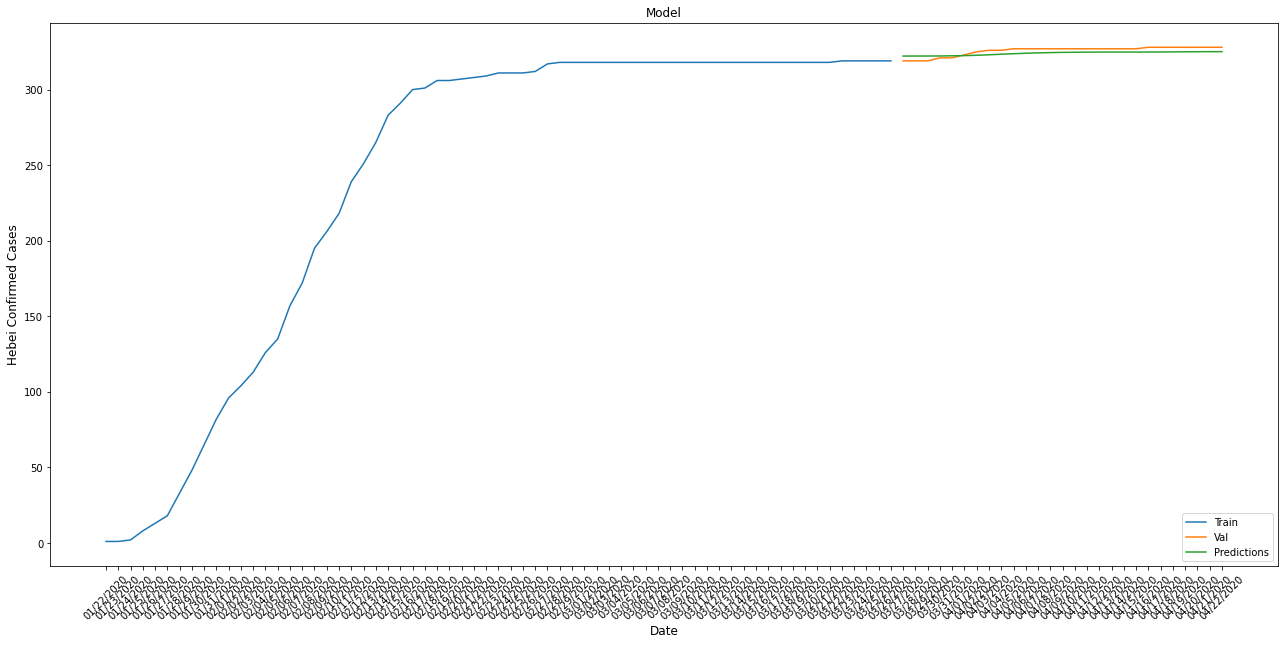

In [0]:
plt.figure(figsize=(22,10))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Hebei Confirmed Cases', fontsize=12)
plt.plot(train['Hebei Confirmed Cases'])
plt.plot(validHebei1[['Hebei Confirmed Cases', 'Hebei Predicted Cases']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('/content/drive/My Drive/figzero.png', dpi=300)
#plt.show()

In [0]:
validHebei1

,Hebei Confirmed Cases,Hebei Predicted Cases
Dates,,
03/27/2020,319,322.176422
03/28/2020,319,322.202057
03/29/2020,319,322.219635
03/30/2020,321,322.231781
03/31/2020,321,322.345856
04/01/2020,323,322.480713
04/02/2020,325,322.703888
04/03/2020,326,323.031738
04/04/2020,326,323.400055


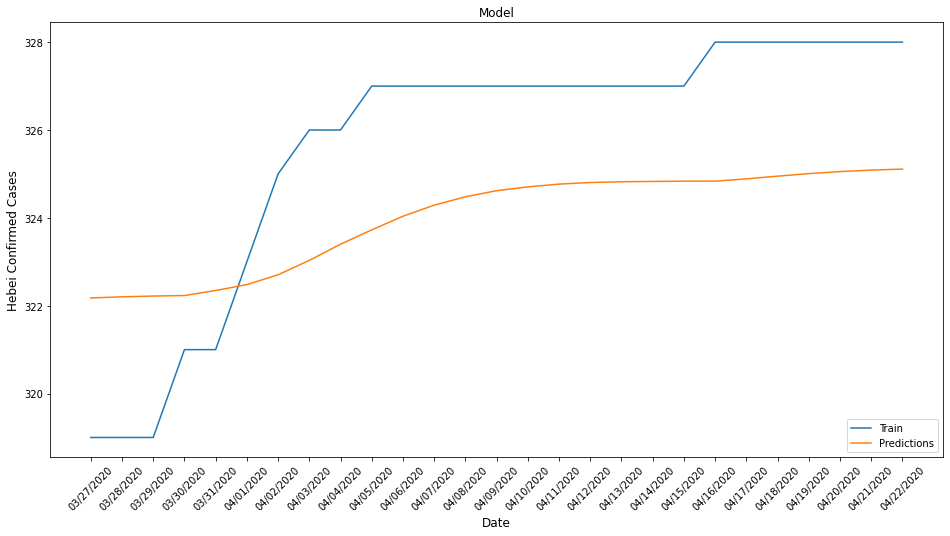

In [0]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Hebei Confirmed Cases', fontsize=12)
plt.plot(validHebei1)
plt.legend(['Train', 'Predictions'], loc='lower right')
plt.savefig('/content/drive/My Drive/figone.png', dpi=300)
#plt.show()

In [0]:
from sklearn.metrics import r2_score
score = r2_score(validHebei1['Hebei Confirmed Cases'], validHebei1['Hebei Predicted Cases'])
print(score)

0.22922161845911726


LSTM FOR CHINA DEATHS

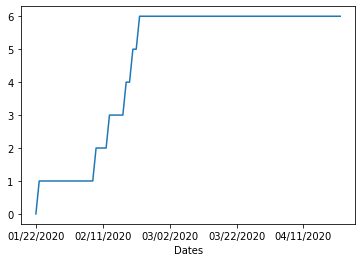

In [0]:
df2 = dflstm['Hebei Deaths'].plot()
#plt.figure(figsize=(16,8))

In [0]:
data2 = dflstm.filter(['Hebei Deaths'])

In [0]:
dataset2 = data2.values

In [0]:
training_data_len2 = math.ceil(len(dataset2) * 0.7)
training_data_len2

65

In [0]:
scaler2 = MinMaxScaler(feature_range=(0,1))
scaled_data2 = scaler2.fit_transform(dataset2)

In [0]:
scaled_data2

array([[0.        ],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.33333333],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.66666667],
       [0.66666667],
       [0.83333333],
       [0.83333333],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.   

In [0]:
train_data2 = scaled_data2[0:training_data_len2, :]
x_train2 = []
y_train2 = []

for i in range(10, len(train_data2)):
  x_train2.append(train_data2[i-10:i, 0])
  y_train2.append(train_data2[i, 0])
  if i<= 10:
    print(x_train2)
    print(y_train2)
    print()

[array([0.        , 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667])]
[0.16666666666666666]



In [0]:
x_train2, y_train2 = np.array(x_train2), np.array(y_train2)

In [0]:
x_train2 = np.reshape(x_train2, (x_train2.shape[0], x_train2.shape[1], 1))
x_train2.shape

(55, 10, 1)

In [0]:
model2 = Sequential()
model2.add(LSTM(50, return_sequences=True, input_shape=(x_train2.shape[1], 1)))
model2.add(LSTM(50, return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))

In [0]:
#compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
model2.fit(x_train2, y_train2, batch_size=1, epochs=50)

Epoch 1/50
55/55 [==============================] - 1s 18ms/step - loss: 0.0717
Epoch 2/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0150
Epoch 3/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0152
Epoch 4/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0150
Epoch 5/50
55/55 [==============================] - 0s 9ms/step - loss: 0.0113
Epoch 6/50
55/55 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 7/50
55/55 [==============================] - 0s 9ms/step - loss: 0.0135
Epoch 8/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0098
Epoch 9/50
55/55 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 10/50
55/55 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 11/50
55/55 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 12/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 13/50
55/55 [=============================

In [0]:
test_data2 = scaled_data2[training_data_len2-10: , :]
x_test2 = []
y_test2 = dataset2[training_data_len2:, :]
for i in range(10, len(test_data2)):
  x_test2.append(test_data2[i-10:i, 0])
  

In [0]:
len(test_data2)

37

In [0]:
x_test2 = np.array(x_test2)

In [0]:
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1 ))

In [0]:
predictions2 = model.predict(x_test2)
predictions2 = scaler2.inverse_transform(predictions2)

In [0]:
rmse = np.sqrt( np.mean( predictions2 - y_test )**2)
rmse

319.68194301040086

In [0]:
train2 = data2[:training_data_len2]
validHebei2 = data2[training_data_len2:]
validHebei2['Hebei Predicted Deaths'] = predictions2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
validHebei2


,Hebei Deaths,Hebei Predicted Deaths
Dates,,
03/27/2020,6,5.947687
03/28/2020,6,5.947687
03/29/2020,6,5.947687
03/30/2020,6,5.947687
03/31/2020,6,5.947687
04/01/2020,6,5.947687
04/02/2020,6,5.947687
04/03/2020,6,5.947687
04/04/2020,6,5.947687


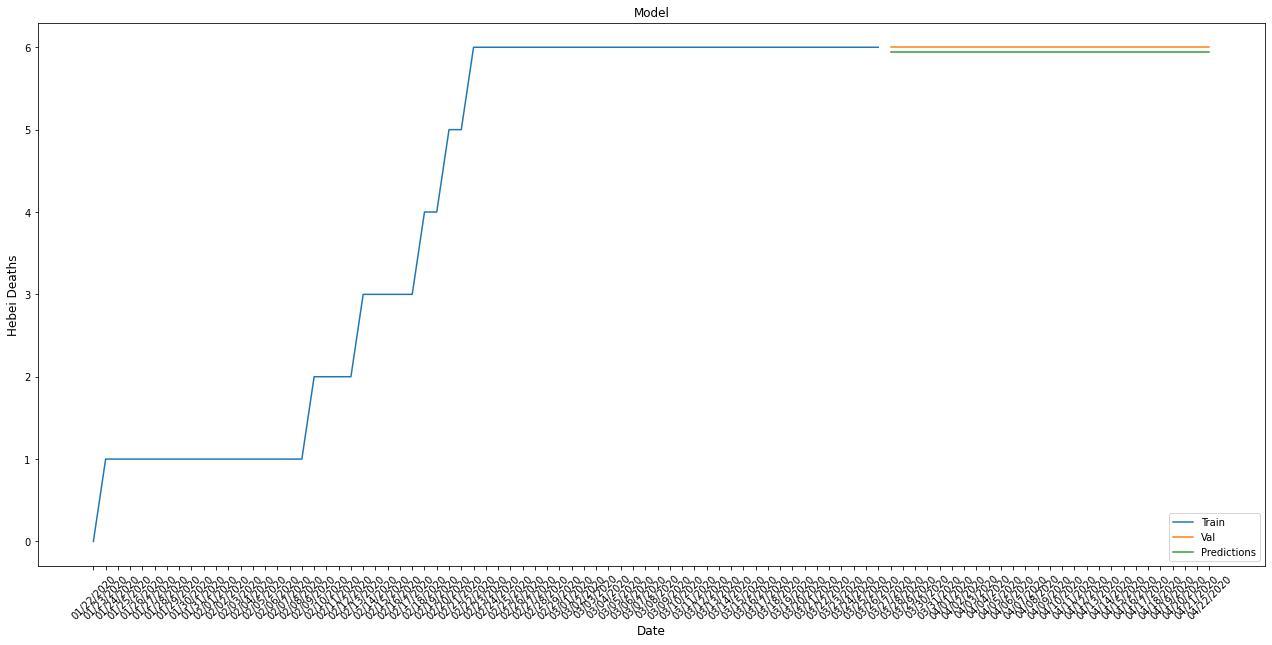

In [0]:
plt.figure(figsize=(22,10))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Hebei Deaths', fontsize=12)
plt.plot(train2['Hebei Deaths'])
plt.plot(validHebei2[['Hebei Deaths', 'Hebei Predicted Deaths']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
#plt.savefig('/content/drive/My Drive/figzero.png', dpi=300)
plt.show()

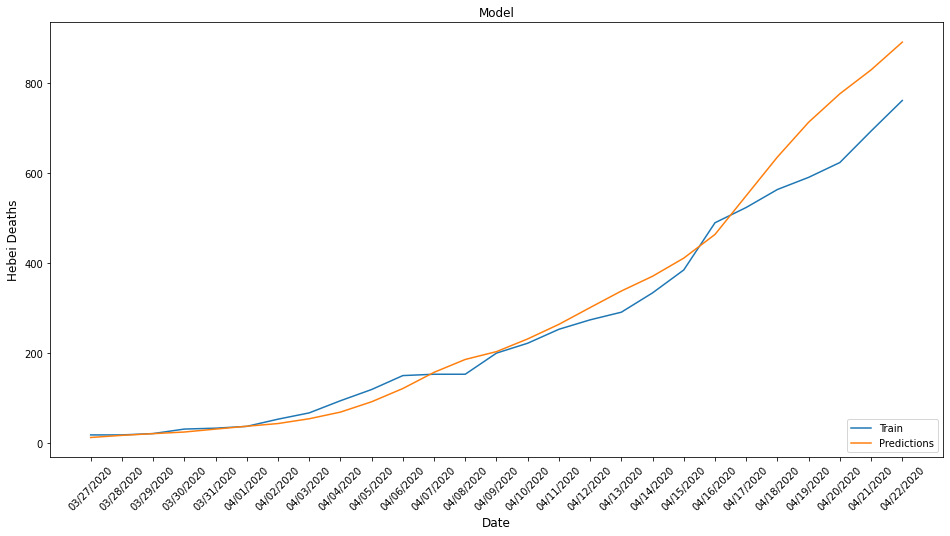

In [0]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Hebei Deaths', fontsize=12)
plt.plot(validontario2)
plt.legend(['Train', 'Predictions'], loc='lower right')
#plt.savefig('/content/drive/My Drive/figone.png', dpi=300)
plt.show()

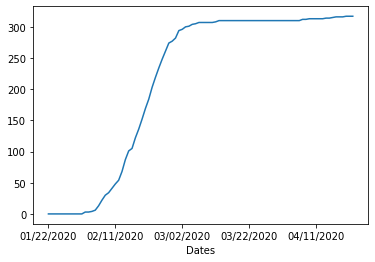

In [0]:
df3 = dflstm['Hebei Recovered'].plot()


In [0]:
data3 = dflstm.filter(['Hebei Recovered'])

In [0]:
dataset3 = data3.values

In [0]:
training_data_len3 = math.ceil(len(dataset3) * 0.7)
training_data_len3

65

In [0]:
scaler3 = MinMaxScaler(feature_range=(0,1))
scaled_data3 = scaler3.fit_transform(dataset3)

In [0]:
scaled_data3

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00946372],
       [0.00946372],
       [0.0126183 ],
       [0.01892744],
       [0.04100946],
       [0.06940063],
       [0.09463722],
       [0.10725552],
       [0.12933754],
       [0.15141956],
       [0.170347  ],
       [0.21451104],
       [0.27444795],
       [0.31861199],
       [0.33123028],
       [0.38485804],
       [0.42902208],
       [0.47949527],
       [0.53312303],
       [0.58044164],
       [0.64037855],
       [0.69085174],
       [0.73817035],
       [0.78233438],
       [0.82334385],
       [0.86435331],
       [0.87381703],
       [0.88958991],
       [0.92744479],
       [0.93375394],
       [0.94637224],
       [0.94952681],
       [0.95899054],
       [0.96214511],
       [0.96845426],
       [0.96845426],
       [0.968

In [0]:
train_data3 = scaled_data3[0:training_data_len2, :]
x_train3 = []
y_train3 = []

for i in range(10, len(train_data3)):
  x_train3.append(train_data3[i-10:i, 0])
  y_train3.append(train_data3[i, 0])
  if i<= 10:
    print(x_train3)
    print(y_train3)
    print()

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]
[0.0]



In [0]:
x_train3, y_train3 = np.array(x_train3), np.array(y_train3)

In [0]:
x_train3 = np.reshape(x_train3, (x_train3.shape[0], x_train3.shape[1], 1))
x_train3.shape

(55, 10, 1)

In [0]:
model3 = Sequential()
model3.add(LSTM(50, return_sequences=True, input_shape=(x_train2.shape[1], 1)))
model3.add(LSTM(50, return_sequences=False))
model3.add(Dense(25))
model3.add(Dense(1))

In [0]:
model3.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
model3.fit(x_train3, y_train3, batch_size=1, epochs=50)

Epoch 1/50
55/55 [==============================] - 1s 17ms/step - loss: 0.1096
Epoch 2/50
55/55 [==============================] - 1s 9ms/step - loss: 0.0096
Epoch 3/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0102
Epoch 4/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0094
Epoch 5/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0082
Epoch 6/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0068
Epoch 7/50
55/55 [==============================] - 0s 7ms/step - loss: 0.0034
Epoch 8/50
55/55 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 9/50
55/55 [==============================] - 0s 8ms/step - loss: 5.9667e-04
Epoch 10/50
55/55 [==============================] - 0s 8ms/step - loss: 3.9915e-04
Epoch 11/50
55/55 [==============================] - 0s 8ms/step - loss: 3.6204e-04
Epoch 12/50
55/55 [==============================] - 0s 8ms/step - loss: 4.0313e-04
Epoch 13/50
55/55 [=============

In [0]:
test_data3 = scaled_data3[training_data_len3-10: , :]
x_test3 = []
y_test3 = dataset3[training_data_len3:, :]
for i in range(10, len(test_data3)):
  x_test3.append(test_data2[i-10:i, 0])
  

In [0]:
len(test_data3)

37

In [0]:
x_test3 = np.array(x_test3)

In [0]:
x_test3 = np.reshape(x_test3, (x_test3.shape[0], x_test3.shape[1], 1 ))

In [0]:
predictions3 = model.predict(x_test3)
predictions3 = scaler3.inverse_transform(predictions3)

In [0]:
rmse = np.sqrt( np.mean( predictions3 - y_test )**2)
rmse

11.393518518518519

In [0]:
train3 = data3[:training_data_len3]
validHebei3 = data3[training_data_len3:]
validHebei3['Hebei Predicted Recovered'] = predictions3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
validHebei3


,Hebei Recovered,Hebei Predicted Recovered
Dates,,
03/27/2020,310,314.236115
03/28/2020,310,314.236115
03/29/2020,310,314.236115
03/30/2020,310,314.236115
03/31/2020,310,314.236115
04/01/2020,310,314.236115
04/02/2020,310,314.236115
04/03/2020,310,314.236115
04/04/2020,310,314.236115


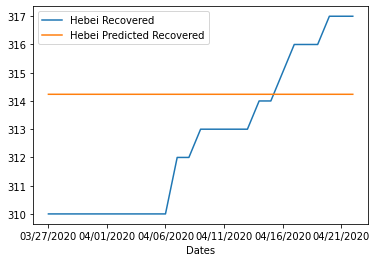

In [0]:
validHebei3.plot()

In [0]:
valid_final_lstm = validHebei1.join(validHebei2.join(validHebei3))
valid_final_lstm

,Hebei Confirmed Cases,Hebei Predicted Cases,Hebei Deaths,Hebei Predicted Deaths,Hebei Recovered,Hebei Predicted Recovered
Dates,,,,,,
03/27/2020,319,322.176422,6,5.947687,310,314.236115
03/28/2020,319,322.202057,6,5.947687,310,314.236115
03/29/2020,319,322.219635,6,5.947687,310,314.236115
03/30/2020,321,322.231781,6,5.947687,310,314.236115
03/31/2020,321,322.345856,6,5.947687,310,314.236115
04/01/2020,323,322.480713,6,5.947687,310,314.236115
04/02/2020,325,322.703888,6,5.947687,310,314.236115
04/03/2020,326,323.031738,6,5.947687,310,314.236115
04/04/2020,326,323.400055,6,5.947687,310,314.236115


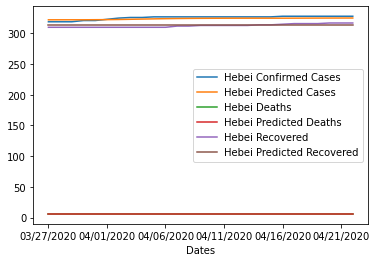

In [0]:
valid_final_lstm.plot()

In [0]:
from sklearn.metrics import *

In [0]:
score = r2_score(valid_final_lstm['Hebei Confirmed Cases'], valid_final_lstm['Hebei Predicted Cases'])
score

0.22922161845911726

In [0]:
score1 = r2_score(valid_final_lstm['Hebei Deaths'], valid_final_lstm['Hebei Predicted Deaths'])
score1

0.0

In [0]:
score3 = r2_score(valid_final_lstm['Hebei Recovered'], valid_final_lstm['Hebei Predicted Recovered'])
score3

-0.39082098701960266

In [0]:
Average = (score + score1 + score3) / 3
Average

-0.05386645618682847

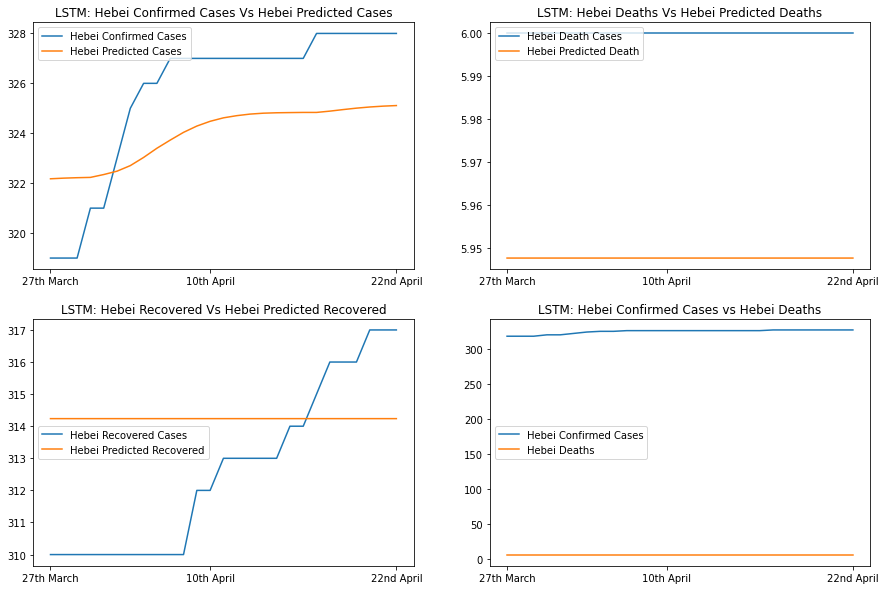

In [0]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(2,2,figsize=(15,10))
#plt.xticks([1,2,3], [1,2,3], [1,2,3], [1,2,3]) #['jan', 'March', 'April'], ['jan', 'March', 'April'], ['jan', 'March', 'April'])
plt.setp(a, xticks=[0, 12, 26], xticklabels=['27th March', '10th April', '22nd April'])

a[0][0].plot(valid_final_lstm['Hebei Confirmed Cases']) 
a[0][0].plot(valid_final_lstm['Hebei Predicted Cases'])
a[0][0].legend(['Hebei Confirmed Cases','Hebei Predicted Cases'], loc="upper left")
a[0][0].set_title('LSTM: Hebei Confirmed Cases Vs Hebei Predicted Cases')
a[0][1].plot(valid_final_lstm['Hebei Deaths'])
a[0][1].plot(valid_final_lstm['Hebei Predicted Deaths'])
a[0][1].legend(['Hebei Death Cases','Hebei Predicted Death'], loc="upper left")
a[0][1].set_title('LSTM: Hebei Deaths Vs Hebei Predicted Deaths')
a[1][0].plot(valid_final_lstm['Hebei Recovered'])
a[1][0].plot(valid_final_lstm['Hebei Predicted Recovered'])
a[1][0].legend(['Hebei Recovered Cases','Hebei Predicted Recovered'], loc="center left")
a[1][0].set_title('LSTM: Hebei Recovered Vs Hebei Predicted Recovered')
a[1][1].plot(valid_final_lstm['Hebei Confirmed Cases'])
a[1][1].plot(valid_final_lstm['Hebei Deaths'])
a[1][1].legend(['Hebei Confirmed Cases','Hebei Deaths'], loc="center left")
a[1][1].set_title('LSTM: Hebei Confirmed Cases vs Hebei Deaths')

plt.savefig('/content/drive/My Drive/COVID-19/COVID-19_Data/Hebeigrid_LSTM.png', dpi=1200)
